# Generate a new graph

category      FOOD  SERVICE  GENERAL  AMBIENCE  PRICE
name                                                 
Gerestaurant   573      361      247       180     77
Experts        563      360      250       177     76
LLM            599      343      237       158     68
Students       438      280      190       127     57
Crowdworkers   435      255      183       118     49


C:\Users\nikla\AppData\Local\Temp\ipykernel_4488\115627288.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("Set3", pivot_df.shape[1]).colors


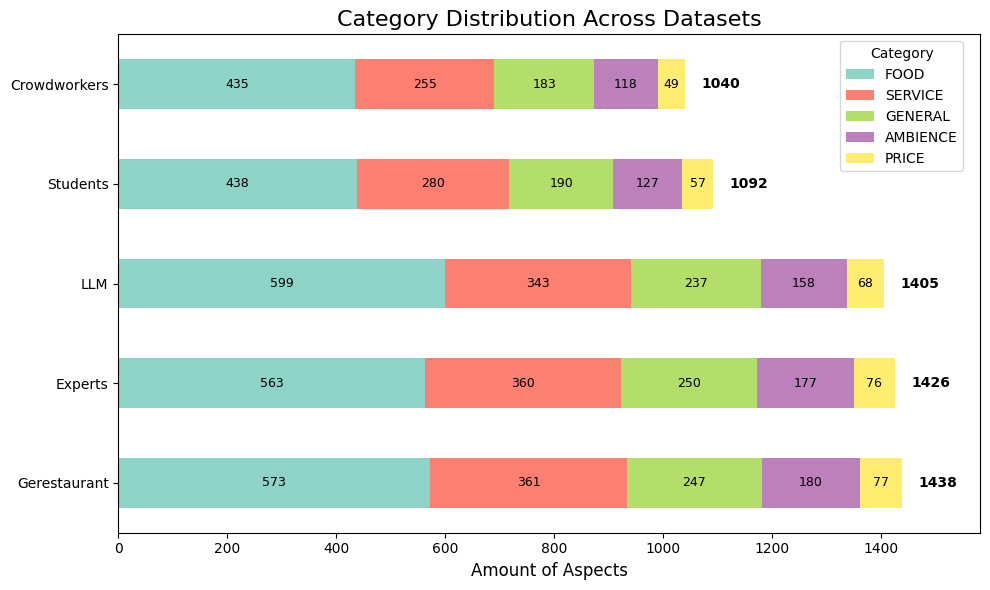

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# Load Excel
file_path = "tasd_dataset_comparison.xlsx"
df = pd.read_excel(file_path)

# Drop total rows
df = df[df["category"] != "Total"]

# Create new column summing explicit + implicit per label
df["positive"] = df["positive-explicit"] + df["positive-implicit"]
df["negative"] = df["negative-explicit"] + df["negative-implicit"]
df["neutral"] = df["neutral-explicit"] + df["neutral-implicit"]

# Sum across polarities to get total per category
df["total"] = df["positive"] + df["negative"] + df["neutral"]

# Pivot so that categories become stacked segments
pivot_df = df.pivot(index="name", columns="category", values="total")

# Optional: rename datasets and categories
dataset_names = {"crowd": "Crowdworkers", "students": "Students",
                 "llm": "LLM", "experts": "Experts", "gerestaurant": "Gerestaurant"}
category_names = {
    "ambiente": "AMBIENCE",
    "essen": "FOOD",
    "gesamteindruck": "GENERAL",
    "preis": "PRICE",
    "service": "SERVICE"
}

pivot_df = pivot_df.rename(index=dataset_names, columns=category_names)
pivot_df = pivot_df[pivot_df.sum().sort_values(ascending=False).index]
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]
print(pivot_df)
colors = cm.get_cmap("Set3", pivot_df.shape[1]).colors  
# Plot stacked bar chart
ax = pivot_df.plot(
    kind="barh",
    stacked=True,
    figsize=(10, 6),
    color=colors
)
max_val = pivot_df.sum(axis=1).max()
# Add numbers on bars
for c in ax.containers:
    ax.bar_label(c, label_type='center', fontsize=9)
for i, total in enumerate(pivot_df.sum(axis=1)):
    ax.text(
        total + 30,  # offset a little to the right of the bar
        i,          # y-position
        str(total), # text to display
        va='center',
        fontsize=10,
        fontweight='bold'
    )
# Styling
plt.xlim(0, max_val * 1.1)
plt.title("Category Distribution Across Datasets", fontsize=16)
plt.xlabel("Amount of Aspects", fontsize=12)
plt.ylabel("", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Category", bbox_to_anchor=(0.83, 1), loc="upper left")
plt.tight_layout()
plt.savefig("category_distribution_tasd.pdf", bbox_inches="tight")
plt.show()


,Explicit,Implicit
name,,
Gerestaurant,1059,379
Experts,1028,398
LLM,996,409
Students,851,241
Crowdworkers,777,263


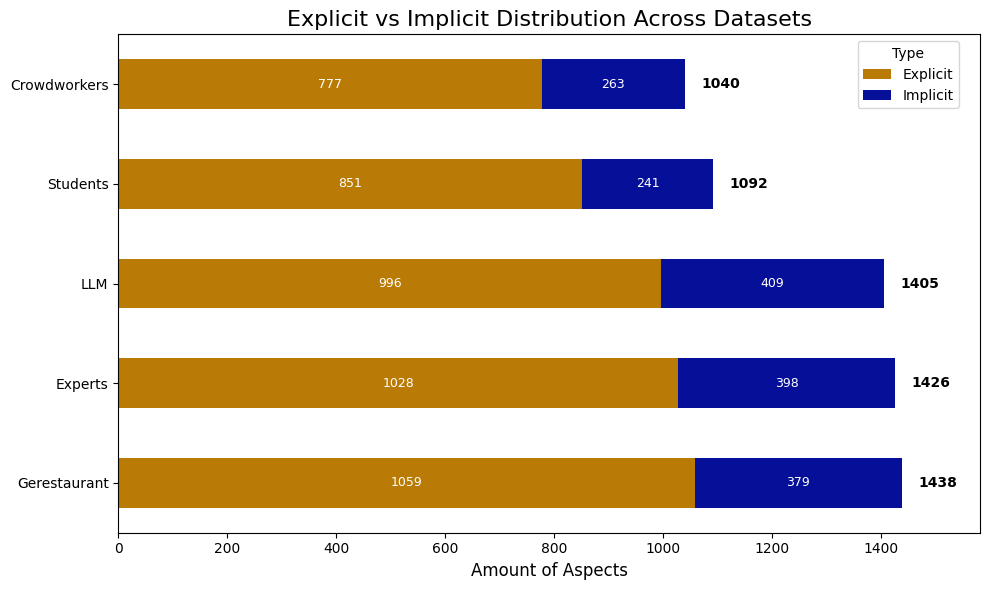

In [2]:
# Sum explicit and implicit counts across all categories for each dataset
df_explicit_implicit = df.groupby("name").agg({
    "positive-explicit": "sum",
    "negative-explicit": "sum",
    "neutral-explicit": "sum",
    "positive-implicit": "sum",
    "negative-implicit": "sum",
    "neutral-implicit": "sum"
})
colors = ["#b97b06", "#050F97"]
# Create total explicit and implicit columns
df_explicit_implicit["Explicit"] = df_explicit_implicit[[
    "positive-explicit", "negative-explicit", "neutral-explicit"]].sum(axis=1)
df_explicit_implicit["Implicit"] = df_explicit_implicit[[
    "positive-implicit", "negative-implicit", "neutral-implicit"]].sum(axis=1)

# Keep only the new columns
df_explicit_implicit = df_explicit_implicit[["Explicit", "Implicit"]]

# Rename datasets
df_explicit_implicit = df_explicit_implicit.rename(index=dataset_names)

# Sort datasets by total aspects
df_explicit_implicit = df_explicit_implicit.loc[df_explicit_implicit.sum(axis=1).sort_values(ascending=False).index]
display(df_explicit_implicit)
# Plot horizontal stacked bar chart
ax = df_explicit_implicit.plot(kind="barh", stacked=True, figsize=(10, 6), color=colors)
max_val = df_explicit_implicit.sum(axis=1).max()
# Add numbers inside bars
for c in ax.containers:
    ax.bar_label(c, label_type='center', fontsize=9, color='white')
for i, total in enumerate(df_explicit_implicit.sum(axis=1)):
    ax.text(
        total + 30,  # offset a little to the right of the bar
        i,          # y-position
        str(total), # text to display
        va='center',
        fontsize=10,
        fontweight='bold'
    )
# Styling
plt.xlim(0, max_val * 1.1)
plt.title("Explicit vs Implicit Distribution Across Datasets", fontsize=16)
plt.xlabel("Amount of Aspects", fontsize=12)
plt.ylabel("")
plt.legend(title="Type", bbox_to_anchor=(0.85, 1), loc="upper left")
plt.tight_layout()
plt.show()


,positive,negative,neutral
name,,,
Gerestaurant,783,594,61
Experts,782,584,60
LLM,773,557,75
Students,622,427,43
Crowdworkers,586,421,33


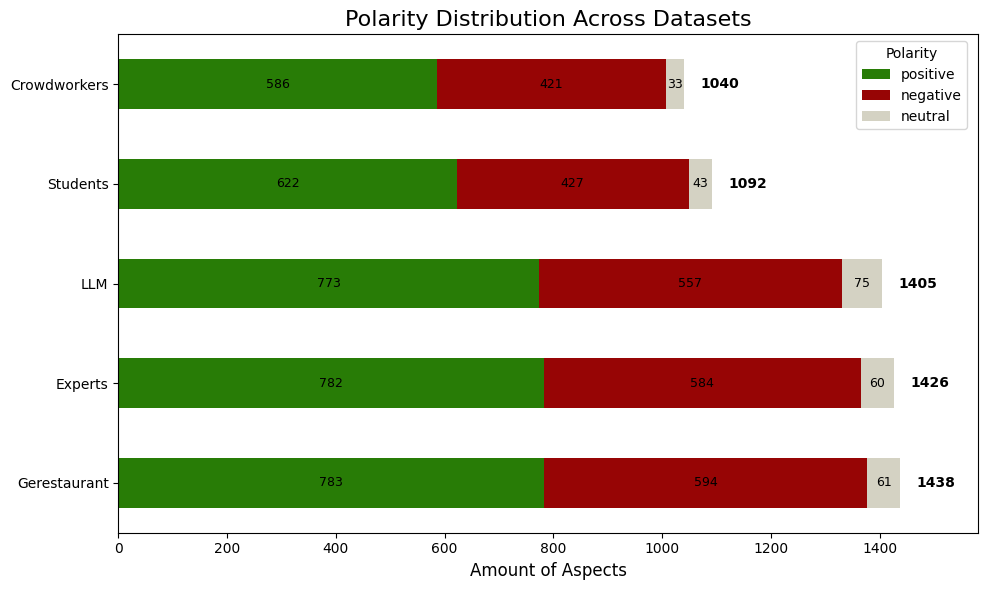

In [3]:
# Prepare polarity sums
df_polarity = df.copy()
df_polarity = df_polarity.groupby("name")[["positive", "negative", "neutral"]].sum()
colors = ["#287c06", "#970505", "#d4d2c3"]
# Rename datasets
df_polarity = df_polarity.rename(index=dataset_names)

# Sort datasets by total aspects
df_polarity = df_polarity.loc[df_polarity.sum(axis=1).sort_values(ascending=False).index]

max_val = df_polarity.sum(axis=1).max()
display(df_polarity)
# Plot
ax = df_polarity.plot(kind="barh", stacked=True, figsize=(10, 6), color=colors)
for c in ax.containers:
    ax.bar_label(c, label_type='center', fontsize=9)

for i, total in enumerate(df_polarity.sum(axis=1)):
    ax.text(
        total + 30,  # offset a little to the right of the bar
        i,          # y-position
        str(total), # text to display
        va='center',
        fontsize=10,
        fontweight='bold'
    )
plt.xlim(0, max_val * 1.1)
plt.title("Polarity Distribution Across Datasets", fontsize=16)
plt.xlabel("Amount of Aspects", fontsize=12)
plt.ylabel("")
plt.legend(title="Polarity", bbox_to_anchor=(0.85, 1), loc="upper left")
plt.tight_layout()
plt.show()
